In [1]:
import urllib.request
import pandas as pd
import xlrd

# For data retrival:
import requests
from bs4 import BeautifulSoup
import re
import sys, os

Download the Dataset

In [2]:
page = requests.get('https://data.humdata.org/dataset/acaps-covid19-government-measures-dataset')

# Create a BeautifulSoup object
soup = BeautifulSoup(page.text, 'html.parser')
artist_name_list = soup#.find(class_='dsb-activity-item')
artist_name_list_items = artist_name_list.find_all('a')


for txt in artist_name_list_items:
    x = re.search("\/dataset\/e1a91ae0-292d-4434-bc75-bf863d4608ba\/resource\/.*?\"", str(txt)) 
    if x is not None:
        print(x.group(0).split('"')[0])
        break
        
dynamic = str(x.group(0).split('"')[0])

/dataset/e1a91ae0-292d-4434-bc75-bf863d4608ba/resource/d5273846-75a1-42d7-9c53-8fdbdc8411f1


In [3]:
full_url = "https://data.humdata.org" + dynamic + "/download/acaps_covid19_government_measures_dataset.xlsx"

print("Trying to retrieve data from:")
print(full_url)

try:
    urllib.request.urlretrieve(full_url, "data.xlsx")
except urllib.error.HTTPError:
    print('404 - The ressource could not be found :(( ')
except Exception as e:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
    print(exc_type, fname, exc_tb.tb_lineno)
else:
    print("SUCCESS!") 
 

Trying to retrieve data from:
https://data.humdata.org/dataset/e1a91ae0-292d-4434-bc75-bf863d4608ba/resource/d5273846-75a1-42d7-9c53-8fdbdc8411f1/download/acaps_covid19_government_measures_dataset.xlsx
SUCCESS!


In [4]:
file_name = 'data.xlsx'

dfs = pd.read_excel(file_name, sheet_name='Database')

In [5]:
dfs.head()

ID      COUNTRY  ISO ADMIN_LEVEL_NAME  PCODE REGION  \
0   1  Afghanistan  AFG              NaN    NaN   Asia   
1   2  Afghanistan  AFG            Kabul    NaN   Asia   
2   3  Afghanistan  AFG              NaN    NaN   Asia   
3   4  Afghanistan  AFG              NaN    NaN   Asia   
4   5  Afghanistan  AFG              NaN    NaN   Asia   

                               LOG_TYPE  \
0  Introduction / extension of measures   
1  Introduction / extension of measures   
2  Introduction / extension of measures   
3  Introduction / extension of measures   
4  Introduction / extension of measures   

                                 CATEGORY  \
0                  Public health measures   
1                  Public health measures   
2                  Public health measures   
3  Governance and socio-economic measures   
4                       Social distancing   

                                             MEASURE TARGETED_POP_GROUP  \
0  Health screenings in airports and border cross...                 No   
1                  Isolation and quarantine policies                 No   
2                                Awareness campaigns                 No   
3  Emergency administrative structures activated ...                 No   
4                            Limit public gatherings                 No   

                    COMMENTS NON_COMPLIANCE DATE_IMPLEMENTED  \
0                        NaN            NaN       2020-02-12   
1                        NaN            NaN       2020-02-12   
2                        NaN            NaN       2020-02-12   
3                        NaN            NaN       2020-02-12   
4  Nevruz festival cancelled            NaN       2020-03-12   

               SOURCE SOURCE_TYPE  \
0  Ministry of Health  Government   
1  Ministry of Health  Government   
2  Ministry of Health  Government   
3  Ministry of Health  Government   
4                  AA       Media   

                                                LINK ENTRY_DATE  \
0  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
1  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
2  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
3  https://moph.gov.af/en/moph-held-emergency-mee... 2020-03-14   
4  https://www.aa.com.tr/en/asia-pacific/coronavi... 2020-03-14   

  Alternative source  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

Number of entries:

In [6]:
len(dfs)

13657

In [7]:
grouped = dfs['ISO'].to_list()

In [8]:
print(list(set(grouped)))

['COG', 'NPL', 'NRU', 'BIH', 'TUR', 'KEN', 'EST', 'MDV', 'STP', 'KGZ', 'ESP', 'GRC', 'LUX', 'BOL', 'MDG', 'NGA', 'PRT', 'IRN', 'ISL', 'CUB', 'NZL', 'RUS', 'BRN', 'TJK', 'HRV', 'SLV', 'MLT', 'TUV', 'SVK', 'AUS', 'ROU', 'ZAF', 'FRA', 'CHL', 'MHL', 'DEU', 'LKA', 'LSO', 'FJI', 'BRA', 'AGO', 'SUR', 'DMA', 'MNE', 'COD', 'ARE', 'BDI', 'ERI', 'HTI', 'CYP', 'LTU', 'TTO', 'CHN', 'SWE', 'SLE', 'TON', 'GIN', 'HND', 'ARG', 'ECU', 'GAB', 'MUS', 'BTN', 'BFA', 'ITA', 'LBR', 'BRB', 'KHM', 'QAT', 'KOR', 'HKG', 'MLI', 'PER', 'COL', 'SVN', 'LIE', 'BLZ', 'GBR', 'SDN', 'DOM', 'UGA', 'SRB', 'GTM', 'CAN', 'CAF', 'FSM', 'POL', 'DNK', 'JOR', 'PAK', 'VNM', 'VEN', 'AZE', 'NLD', 'MKD', 'KIR', 'FIN', 'CZE', 'ATG', 'LVA', 'NOR', 'SSD', 'TZA', 'MEX', 'LBN', 'MNG', 'LBY', 'NAM', 'JPN', 'TCD', 'SLB', 'VCT', 'HUN', 'YEM', 'UKR', 'ARM', 'AUT', 'EGY', 'LAO', 'BGD', 'PHL', 'BGR', 'PRY', 'TKM', 'MWI', 'SAU', 'IDN', 'SOM', 'GUY', 'BEN', 'GRD', 'ETH', 'IND', 'MOZ', 'CRI', 'SMR', 'URY', 'BLR', 'RWA', 'ZWE', 'GNB', 'SGP', 'VUT'

W. Sahara
SAH
Falkland Is.
FLK
Greenland
GRL
Fr. S. and Antarctic Lands
ATF
Puerto Rico
PRI
Palestine
PSX
New Caledonia
NCL
Taiwan
TWN
Antarctica
ATA
N. Cyprus
CYN
Kosovo
KOS


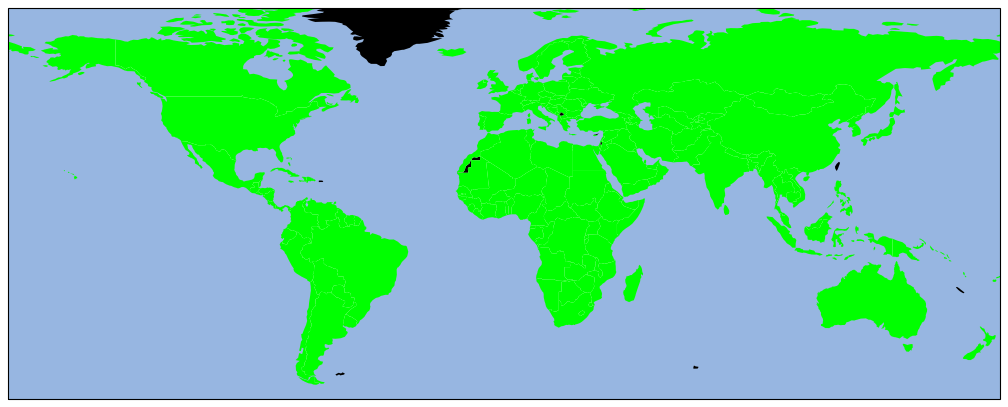

In [10]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
#ax.add_feature(cartopy.feature.COASTLINE)
#ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
#ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
#ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-150, 60, -25, 60])

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

lol = [str(i) for i in list(set(grouped))]
lol.append('SDS') #Southsudan SSD
lol.append('SOL') #Somaliland SOM

for country in countries:
    if country.attributes['ADM0_A3'] in lol:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 1, 0),
                          label=country.attributes['ADM0_A3'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=(0, 0, 0),
                          label=country.attributes['ADM0_A3'])
        print(country.attributes['BRK_NAME'])
        print(country.attributes['ADM0_A3'])

plt.show()

In [11]:
grouped = dfs['MEASURE'].to_list()

In [13]:
for i in sorted([x.capitalize() for x in list(set(grouped))]):
    print(i) 

Additional health/documents requirements upon arrival
Amendments to funeral and burial regulations
Awareness campaigns
Awareness campaigns
Border checks 
Border closure 
Changes in prison-related policies
Checkpoints within the country
Closure of businesses and public services
Complete border closure
Curfews
Curfews
Domestic travel restrictions
Economic measures
Emergency administrative structures activated or established
Full lockdown
Full lockdown
General recommendations
Health screenings in airports and border crossings
Humanitarian exemptions
International flights suspension
Isolation and quarantine policies
Limit product imports/exports
Limit public gatherings
Limit public gatherings
Lockdown of refugee/idp camps or other minorities
Mass population testing
Military deployment
Obligatory medical tests not related to covid-19
Other public health measures enforced
Partial lockdown
Psychological assistance and medical social work
Requirement to wear protective gear in public
Requireme

Ok so there are few duplicates due to capltalization

TODO:
    - ☑️ look up welche Category jedes measure ist und wie konsistent das ist
    - ☑️ Distribution of source types
    - ☑️ zeitliche verteilung aller einträge
    - ☑️ plausibility spotchecks 
    - main sources

In [14]:
#convert column to datetime
dfs['DATE_IMPLEMENTED'].head()

0   2020-02-12
1   2020-02-12
2   2020-02-12
3   2020-02-12
4   2020-03-12
Name: DATE_IMPLEMENTED, dtype: datetime64[ns]

2020-01-01 00:00:00
2020-09-30 00:00:00


Text(0, 0.5, '# of Measures')

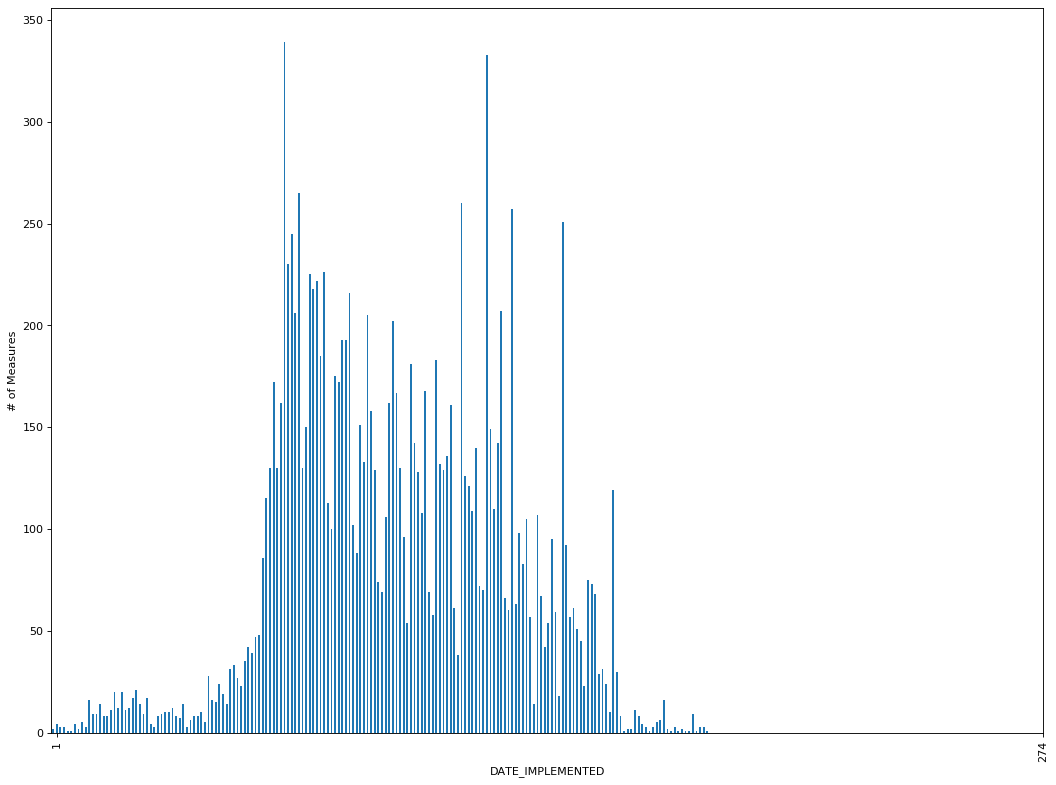

In [15]:
df = dfs
df["DATE_IMPLEMENTED"] = df["DATE_IMPLEMENTED"].astype("datetime64")
loooool = df["DATE_IMPLEMENTED"] > "2020-06-30 00:00:00"
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

print(df["DATE_IMPLEMENTED"].min())
print(df["DATE_IMPLEMENTED"].max())

df["DATE_IMPLEMENTED"].groupby(df["DATE_IMPLEMENTED"].dt.dayofyear).count().plot(kind="bar")
plt.xticks([int(df["DATE_IMPLEMENTED"].min().dayofyear),int(df["DATE_IMPLEMENTED"].max().dayofyear)],[str(df["DATE_IMPLEMENTED"].min().dayofyear),str(df["DATE_IMPLEMENTED"].max().dayofyear)])
plt.ylabel('# of Measures')

Earliest and latest introduction:
1
250
----------------------------------
Earliest and latest phase-out
7
274
7.0
274.0


Text(0.5, 0, 'Day of the year')

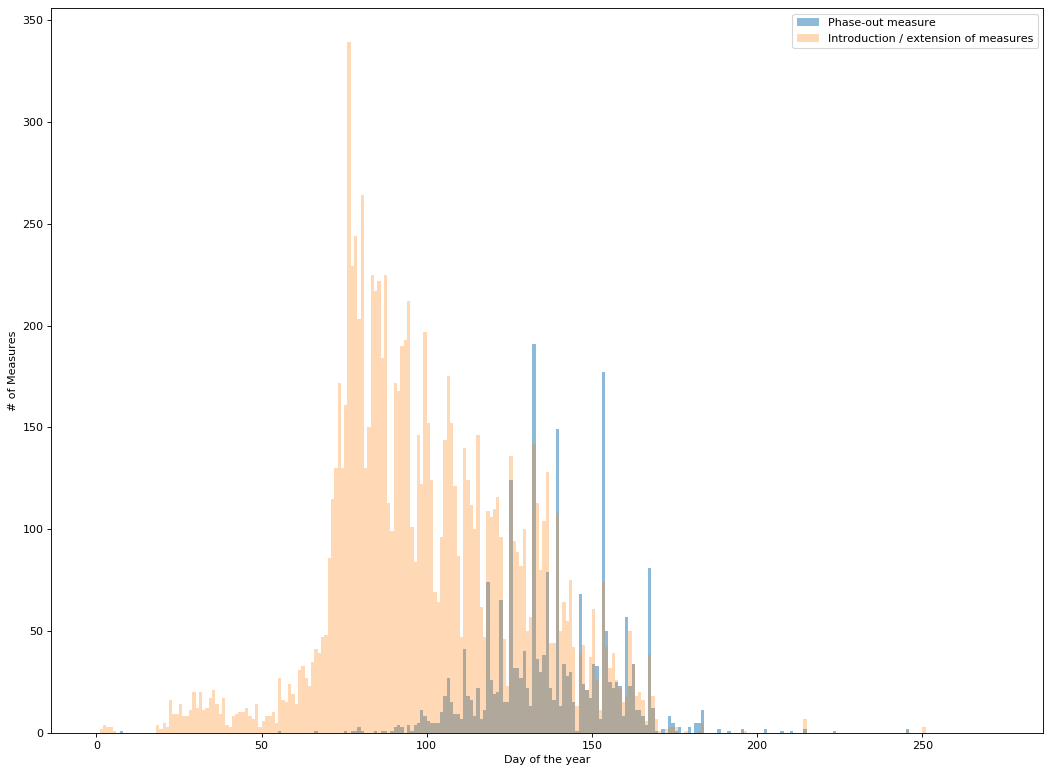

In [16]:
df = dfs
df["DATE_IMPLEMENTED"] = df["DATE_IMPLEMENTED"].astype("datetime64")
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

print('Earliest and latest introduction:')
print(df[df['LOG_TYPE'] == 'Introduction / extension of measures']["DATE_IMPLEMENTED"].min().dayofyear)
print(df[df['LOG_TYPE'] == 'Introduction / extension of measures']["DATE_IMPLEMENTED"].max().dayofyear)
print('----------------------------------')
print('Earliest and latest phase-out')
print(df[df['LOG_TYPE'] == 'Phase-out measure']["DATE_IMPLEMENTED"].min().dayofyear)
print(df[df['LOG_TYPE'] == 'Phase-out measure']["DATE_IMPLEMENTED"].max().dayofyear)
print(df[df['LOG_TYPE'] == 'Phase-out measure']["DATE_IMPLEMENTED"].dt.dayofyear.min())
print(df[df['LOG_TYPE'] == 'Phase-out measure']["DATE_IMPLEMENTED"].dt.dayofyear.max())

all_po = list(df[df['LOG_TYPE'] == 'Phase-out measure']["DATE_IMPLEMENTED"].dt.dayofyear)
all_impl = list(df[df['LOG_TYPE'] == 'Introduction / extension of measures']["DATE_IMPLEMENTED"].dt.dayofyear)

plt.hist(all_po, bins=range(int(max(all_po))), alpha=0.5)
plt.hist(all_impl, bins=range(int(max(all_po))), alpha=0.3)
#plt.xticks([int(df["DATE_IMPLEMENTED"].min().dayofyear),int(df["DATE_IMPLEMENTED"].max().dayofyear)],[str(df["DATE_IMPLEMENTED"].min().dayofyear),str(df["DATE_IMPLEMENTED"].max().dayofyear)])
plt.legend(['Phase-out measure', 'Introduction / extension of measures'])
plt.ylabel('# of Measures')
plt.xlabel('Day of the year')

In [200]:
loooool = df[((df["DATE_IMPLEMENTED"] > "2020-08-30 00:00:00") & (df['LOG_TYPE'] == 'Introduction / extension of measures'))]
pd.set_option('display.max_colwidth', -1)
loooool.head()

ID           COUNTRY  ISO ADMIN_LEVEL_NAME  PCODE   REGION  \
3575   9968   Djibouti          DJI  NaN             NaN     Africa    
7967   13631  Marshall Islands  MHL  NaN             NaN     Pacific   
11367  13633  Solomon Islands   SLB  NaN             NaN     Pacific   
13414  13632  Vanuatu           VUT  NaN             NaN     Pacific   

                                   LOG_TYPE  \
3575   Introduction / extension of measures   
7967   Introduction / extension of measures   
11367  Introduction / extension of measures   
13414  Introduction / extension of measures   

                                     CATEGORY            MEASURE  \
3575   Movement restrictions                   Border closure      
7967   Governance and socio-economic measures  Economic measures   
11367  Governance and socio-economic measures  Economic measures   
13414  Governance and socio-economic measures  Economic measures   

      TARGETED_POP_GROUP  \
3575   No                  
7967   Yes                 
11367  Yes                 
13414  Yes                 

                                                                                                                                                             COMMENTS  \
3575   Borders will remain closed until 1 September                                                                                                                     
7967   government has approved a $6m Covid-19 economic relief program to support local businesses                                                                       
11367  Solomon Islands government has waived examination fees for all students in forms five and six, citing the economic hardships associated with Covid-19.           
13414  minister for finance has announced that all small and medium enterprises that have business licences will receive a one-off stimulus grant of VT60,000 (A$733)   

                     NON_COMPLIANCE DATE_IMPLEMENTED  \
3575   Refusal to enter the country 2020-09-01         
7967   Not applicable               2020-09-06         
11367  Not applicable               2020-09-06         
13414  Not applicable               2020-09-06         

                               SOURCE SOURCE_TYPE  \
3575   Ministere de la Santé Djibouti  Government   
7967   The Guardian                    Media        
11367  The Guardian                    Media        
13414  The Guardian                    Media        

                                                                                                                                                                                                                                                                                                                                                                     LINK  \
3575   https://www.facebook.com/minister.sante.dj/posts/3073726189332961?__cft__[0]=AZVYv1X8LjdiYYF6Zr-Bm4N78R9ZB37yW1KKzJOyus9cHqaopPw_ZHvsOB39mWzsdBkxNsCRXmEfntbCgFb_IosmjaDoIVcjvZUiJrA_595cylPyMUanupKaeStqc7HTXDMBPNGhMkCmyq1u6BnqpJuZfT9-I8Gw6olRFLrSf-VvGWzAV2J7gJu3GgI5vp-r8Mu2LECs5WlqnWf33slSZksOcS_a1wH2ir2sszL9BOvSJVA2gCIkVqogYuJ8OXX9-dY&__tn__=%2CO%2CP-R   
7967   https://www.theguardian.com/world/2020/jun/10/coronavirus-in-the-pacific-weekly-briefing                                                                                                                                                                                                                                                                             
11367  https://www.theguardian.com/world/2020/jun/10/coronavirus-in-the-pacific-weekly-briefing                                                                                                                                                                                                                                                                             
13414  https://www.theguardian.com/world/2020/jun/10/coronavirus-in-the-pacifi

2020-09-30 00:00:00


Text(0, 0.5, '# of Measures')

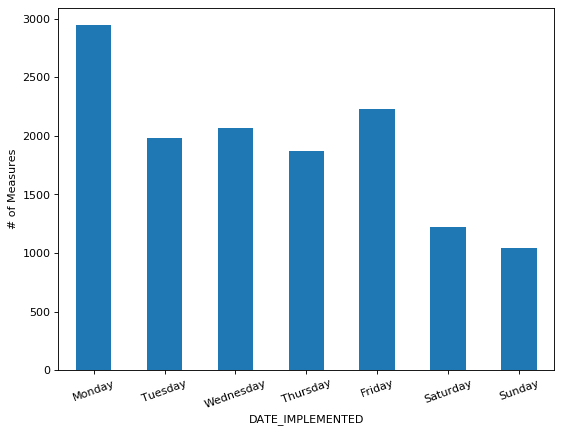

In [30]:
df = dfs
df["DATE_IMPLEMENTED"] = df["DATE_IMPLEMENTED"].astype("datetime64")
loooool = df["DATE_IMPLEMENTED"] > "2020-06-30 00:00:00"
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

print(df["DATE_IMPLEMENTED"].max())
df["DATE_IMPLEMENTED"].groupby(df["DATE_IMPLEMENTED"].dt.dayofweek).count().plot(kind="bar")
plt.xticks([0, 1, 2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'],rotation=20)
plt.ylabel('# of Measures')

2020-09-30 00:00:00


Text(0, 0.5, '# of Measures')

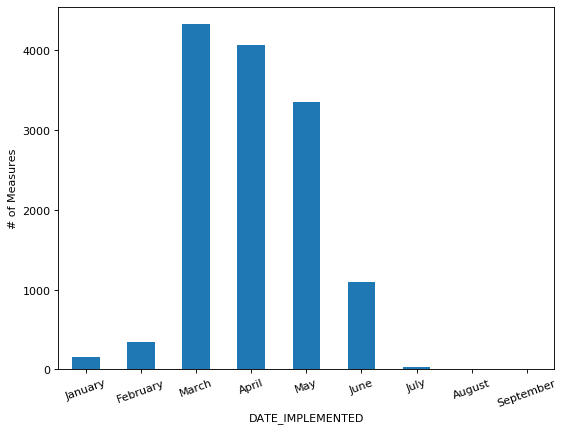

In [29]:
df = dfs
df["DATE_IMPLEMENTED"] = df["DATE_IMPLEMENTED"].astype("datetime64")
loooool = df["DATE_IMPLEMENTED"] > "2020-06-30 00:00:00"
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

print(df["DATE_IMPLEMENTED"].max())
df["DATE_IMPLEMENTED"].groupby(df["DATE_IMPLEMENTED"].dt.month).count().plot(kind="bar")
plt.xticks([0, 1, 2,3,4,5,6,7,8], ['January', 'February', 'March','April', 'May', 'June', 'July', 'August', 'September'],rotation=20)
plt.ylabel('# of Measures')

In [88]:
length = len(dfs)

for col in list(dfs):

    dfs[col].isnull().sum()
    print("NaNs in " + col + ": " + str((dfs[col].isnull().sum()/length)*100) +"%" )


NaNs in ID: 0.0%
NaNs in COUNTRY: 0.0%
NaNs in ISO: 0.0%
NaNs in ADMIN_LEVEL_NAME: 89.28022259647067%
NaNs in PCODE: 100.0%
NaNs in REGION: 0.0%
NaNs in LOG_TYPE: 0.0%
NaNs in CATEGORY: 0.0%
NaNs in MEASURE: 0.0%
NaNs in TARGETED_POP_GROUP: 0.0%
NaNs in COMMENTS: 1.0910155963974517%
NaNs in NON_COMPLIANCE: 9.277293695540749%
NaNs in DATE_IMPLEMENTED: 2.1673866881452732%
NaNs in SOURCE: 0.14644504649630227%
NaNs in SOURCE_TYPE: 0.09518928022259647%
NaNs in LINK: 0.2343120743940836%
NaNs in ENTRY_DATE: 0.0%
NaNs in Alternative source: 91.91623343340412%


In [28]:
df[df['ADMIN_LEVEL_NAME'] == "New York"]

ID                   COUNTRY  ISO ADMIN_LEVEL_NAME  PCODE    REGION  \
13175  6878  United States of America  USA         New York    NaN  Americas   

                                   LOG_TYPE                CATEGORY  \
13175  Introduction / extension of measures  Public health measures   

                                 MEASURE TARGETED_POP_GROUP  \
13175  Isolation and quarantine policies                Yes   

                                                COMMENTS  NON_COMPLIANCE  \
13175  CDC Statement on Self-Quarantine Guidance for ...  Not applicable   

      DATE_IMPLEMENTED SOURCE SOURCE_TYPE  \
13175       2020-03-26    CDC  Government   

                                                    LINK ENTRY_DATE  \
13175  https://www.cdc.gov/media/releases/2020/s0326-... 2020-04-21   

      Alternative source  
13175                NaN

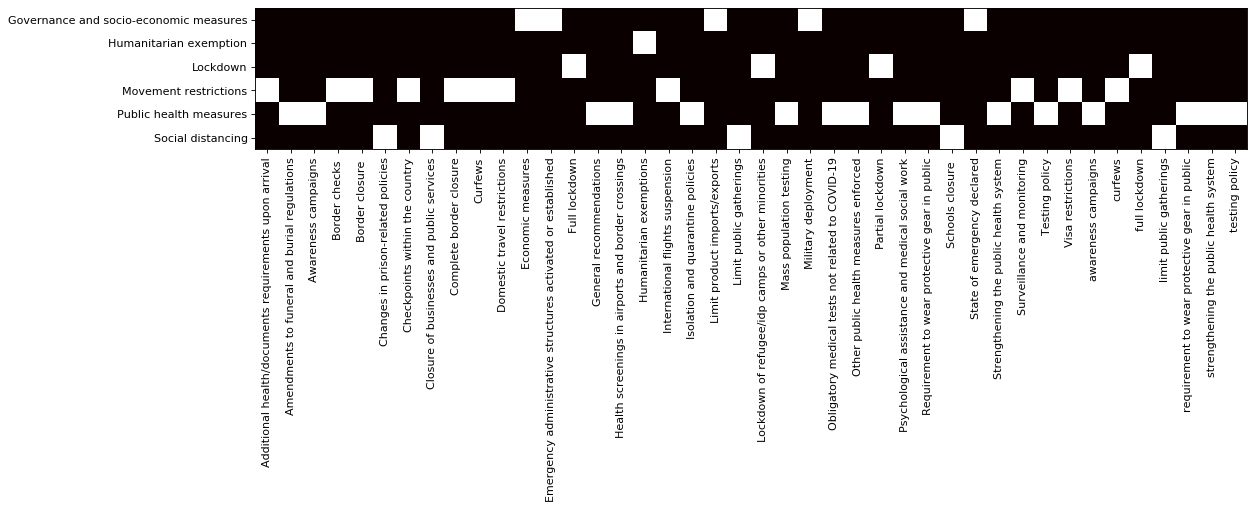

In [122]:
names = []
amounts = np.random.random((len(sorted([x for x in list(set(cats))])), len(sorted([x for x in list(set(grouped))]))))
categories = []
grouped = dfs['MEASURE'].to_list()

a = 0
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

cats = dfs['CATEGORY'].to_list()
for cat in sorted([y for y in list(set(cats))]):
    categories.append(cat)
    #print(cat) 
    c = 0
    for i in sorted([x for x in list(set(grouped))]):
        names.append(i)
        #print(i)
        amounts[a][c] = (list(dfs[dfs['MEASURE'] == i]['CATEGORY']).count(cat)/len(dfs[dfs['MEASURE'] == i]['CATEGORY']))
        #print(list(dfs[dfs['MEASURE'] == i]['CATEGORY']).count(cat))
        #print(len(dfs[dfs['MEASURE'] == i]['CATEGORY']))
        #print('-------------------------------')
        c=c+1
    a=a+1
import matplotlib.pyplot as plt
import numpy as np

a = amounts
plt.xticks(range(len(sorted([x for x in list(set(grouped))]))), names,rotation=90)
plt.yticks(range(len(sorted([x for x in list(set(cat))]))), categories,rotation=0)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [105]:
grouped = dfs['CATEGORY'].to_list()
for i in sorted([x.capitalize() for x in list(set(grouped))]):
    print(i) 

Governance and socio-economic measures
Humanitarian exemption
Lockdown
Movement restrictions
Public health measures
Social distancing


In [138]:
grouped = dfs['LOG_TYPE'].to_list()
for i in sorted([x for x in list(set(grouped))]):
    print(i) 

Introduction / extension of measures
Phase-out measure


In [209]:
df[df['COUNTRY'] == 'Germany'].tail(40)


ID  COUNTRY  ISO        ADMIN_LEVEL_NAME  PCODE  REGION  \
4902  11535  Germany  DEU  Thuringia              NaN     Europe   
4903  11536  Germany  DEU  Thuringia              NaN     Europe   
4904  11537  Germany  DEU  Thuringia              NaN     Europe   
4905  11538  Germany  DEU  Thuringia              NaN     Europe   
4906  11539  Germany  DEU  Thuringia              NaN     Europe   
4907  11540  Germany  DEU  Thuringia              NaN     Europe   
4908  11541  Germany  DEU  Thuringia              NaN     Europe   
4909  11542  Germany  DEU  Thuringia              NaN     Europe   
4910  11543  Germany  DEU  Thuringia              NaN     Europe   
4911  11544  Germany  DEU  Thuringia              NaN     Europe   
4912  11545  Germany  DEU  Thuringia              NaN     Europe   
4913  11546  Germany  DEU  Thuringia              NaN     Europe   
4914  11785  Germany  DEU  NaN                    NaN     Europe   
4915  11786  Germany  DEU  NaN                    NaN     Europe   
4916  11787  Germany  DEU  NaN                    NaN     Europe   
4917  12583  Germany  DEU  Berlin                 NaN     Europe   
4918  12584  Germany  DEU  Berlin                 NaN     Europe   
4919  12585  Germany  DEU  Berlin                 NaN     Europe   
4920  12586  Germany  DEU  North Rhine-Westphalia NaN     Europe   
4921  12587  Germany  DEU  NaN                    NaN     Europe   
4922  12588  Germany  DEU  NaN                    NaN     Europe   
4923  12589  Germany  DEU  NaN                    NaN     Europe   
4924  12590  Germany  DEU  NaN                    NaN     Europe   
4925  12591  Germany  DEU  NaN                    NaN     Europe   
4926  12592  Germany  DEU  NaN                    NaN     Europe   
4927  12593  Germany  DEU  NaN                    NaN     Europe   
4928  13235  Germany  DEU  NaN                    NaN     Europe   
4929  13236  Germany  DEU  NaN                    NaN     Europe   
4930  13237  Germany  DEU  NaN                    NaN     Europe   
4931  13238  Germany  DEU  NaN                    NaN     Europe   
4932  13239  Germany  DEU  NaN                    NaN     Europe   
4933  13240  Germany  DEU  NaN                    NaN     Europe   
4934  13241  Germany  DEU  NaN                    NaN     Europe   
4935  13242  Germany  DEU  NaN                    NaN     Europe   
4936  13619  Germany  DEU  NaN                    NaN     Europe   
4937  13620  Germany  DEU  NaN                    NaN     Europe   
4938  13621  Germany  DEU  NaN                    NaN     Europe   
4939  13622  Germany  DEU  NaN                    NaN     Europe   
4940  13623  Germany  DEU  NaN                    NaN     Europe   
4941  13624  Germany  DEU  NaN                    NaN     Europe   

                                  LOG_TYPE  \
4902  Introduction / extension of measures   
4903  Introduction / extension of measures   
4904  Introduction / extension of measures   
4905  Introduction / extension of measures   
4906  Introduction / extension of measures   
4907  Introduction / extension of measures   
4908  Phase-out measure                      
4909  Introduction / extension of measures   
4910  Phase-out measure                      
4911  Phase-out measure                      
4912  Phase-out measure                      
4913  Phase-out measure                      
4914  Introduction / extension of measures   
4915  Introduction / extension of measures   
4916  Introduction / extension of measures   
4917  Phase-out measure                      
4918  Phase-out measure                      
4919  Phase-out measure                      
4920  Introduction / extension of measures   
4921  Phase-out measure                      
4922  Introduction / extension of measures   
4923  Introduction / extension of measures   
4924  Introduction / extension of measures   
4925  Introduction / extension of measures   
4926  Introduction / extension of measures   
4927  Introduction / ext

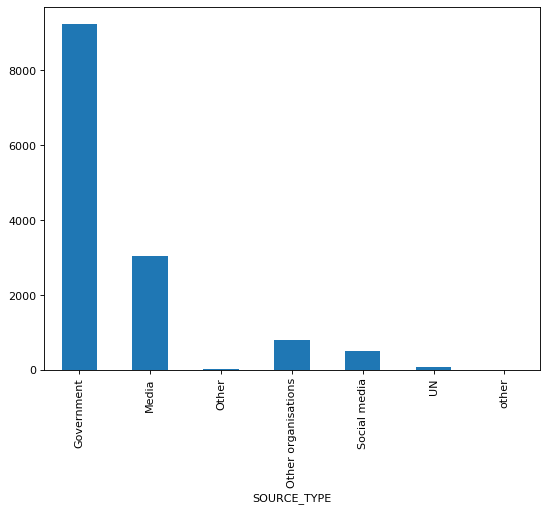

In [231]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


df["SOURCE_TYPE"].groupby(df["SOURCE_TYPE"]).count().plot(kind="bar")
